<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

## Nota: EJECUTAR SOLO EN COLAB
Por alguna razon desconocida el codigo de la función para los analisis univariable se muere en mi jupyter, por lo que no pude guardar tampoco un html con los graficos correctamente. 

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Angelo muñoz
- Nombre de alumno 2: Juan Quilapi


### **Link de repositorio de GitHub:** `https://github.com/FrinyildV/Entregas_MDS_7202`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [2]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("/content/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

### **Descripción del dataset**
* **Invoice** (category): Número de factura asociado a la compra.  
* **StockCode** (category): Código de stock del producto.  
* **Description** (object): Descripción del producto.
* **Quantity** (int64): Cantidad de productos comprados.
* **InvoiceDate** (datetime64[ns]): Fecha y hora de la factura.
* **Price** (float64): Precio del producto.
* **Customer ID** (category): Identificación del cliente.
* **Country** (object): País de origen de la compra.



## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**


El **análisis univariable** se enfoca en examinar una sola columna del conjunto de datos para estudiar su distribución y sus descriptores estadísticos. El **análisis multivariable** implica estudiar si existen relaciones y  correlaciones entre varias variables. El **análisis de datos faltantes** consiste en evaluar la calidad del conjunto de datos y determinar si la falta de datos puede afectar los resultados y determinar si es necesario o conveniente eliminar esas observaciones nulas. Realizar estos análisis nos permite una mayor compresión del conjunto de datos y como se relacionan las variables de este entre sí.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

En general, la función muestra graficos según el tipo de dato:
* Para numericos: usa un sampleo de n_samples con valor predeterminado de 1000, para mostrar un histograma con outliers y uno sin outliers.
* Para Tiempo: usa un sampleo de n_samples con valor predeterminado de 1000 para mostrar un histograma.
* Para variables categoricas: muestra un gráfico de barras con las variables y el conteo de las 100 más frecuentes.     

Considerando esto:




In [6]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

  Dentro de esta columna se puede ver que existen 3 valores negativos y 3.687 valores 0, lo que son valores anormales cosiderando que la columna es de precio. La mayoría de datos se encuentra 1 a 4 teniendo un máximo de 25.111, que es un valor extraño, pero puede significar la compra de varios artículos. 
  
  Se puede decir que presenta una distribución similar a una normal en el gráfico sin outliers. 


In [ ]:
df_retail.shape

(525461, 8)

In [8]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

  En la columna de factura tienen 28.816 valores únicos, lo que esas son las compras totales que hay en la tabla. La máxima frecuencia es de 675, lo que existe una compra con 675 artículos diferentes.

  Destaca además que para el top 100 de compras, las compras abarquen compras por sobre los 256 articulos. 

In [9]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

La columna de códigos de stock muestra 4.632 valores únicos, lo que significaría que existen esa cantidad de artículos diferentes en el conjunto si es que no hay 2 códigos que hagan referencia al mismo artículo. Tambien se puede ver en el gráfico que el articulo mas frecuente se encuentra 3.516 veces, mostrando una gran diferencia con el segundo que está 2.221 veces.

In [10]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

* La columna de descripciones tiene 4.682 valores únicos.
* El elemento mas frecuente es "WHITE HANGING HEART T-LIGHT HOLDER" con frecuencia de 3549.
  * Le sigue la columna de NaN frecuecia de 2928.
* Despues del top 5 de elementos mas frecuentes, las frecuencias van desde los 1466 a 644, con un rango de 822 de frecuencia. A diferencia del top 1 al top 5 de frecuencia con 3549 y 1466 elementos respectivamente con un rango de 2083, es decir, más del doble del resto del grafico. 

In [11]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

* A menos que los numeros negativos indiquen devoluciones o algo similar,  es extraña la magnitud de la cantidad de numeros negativos, llegando al 2,35% del total.
* El valor maximo de 19152 se puede considerar outlier al observar que el 75% de los datos esta dentro del rango de las decenas.
* La distribución observada en los gráficos es bastante irregular.
* Se siguen observando valores negativos en el gráfico sin outliers.  


In [12]:
profile_serie(df_retail['InvoiceDate'])
   

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

* Los valores observados abarcan el periodo de 2009-12-01 al 2010-12-09, es decir del  1 de diciembre de 2009 al 9 de diciembre del 2010, un poco más de un año. 
* Se observan mayores volumenes de compras en las fechas de noviembre, posiblemente atribuibles a las festividades. 
* La distribución antes de septiembre es similar todos los meses en cuanto a forma. 

In [13]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

* La columna del id de los compradores tiene 4.383 valores únicos.
* El id del comprador mas frecuente es 14911 con frecuencia de 5710.
* El top 4 de compradores mas frecuentes tienen un rango de diferencias de 3000, con el top 1 con 5710 compras y el top 4 2710 compras. Luego de estos, el rango baja considerablemente a  2225 pero considerando los otros 96 elementos del top 100

In [14]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

En la categoría país:
* Hay 40 valores unicos.
* El más frecuente y por una gran gran gran diferencia es Reino unido con 485852 de frecuencia. 
* Eire, Germany y Francia tienen valores considerables con mas de 5000 compras de articulos. 

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [15]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

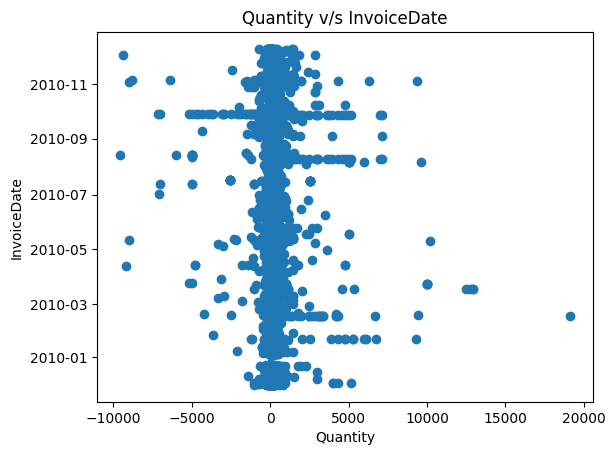

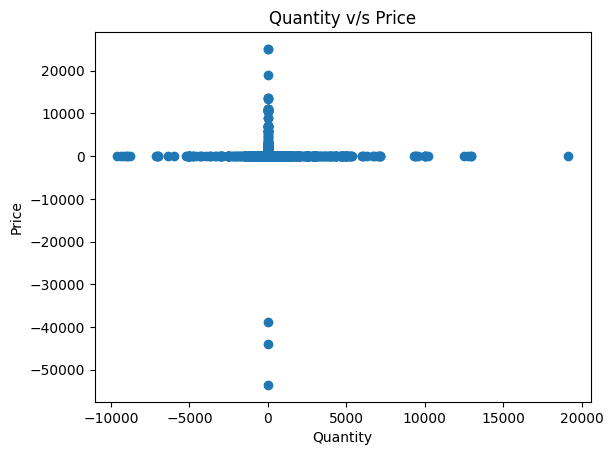

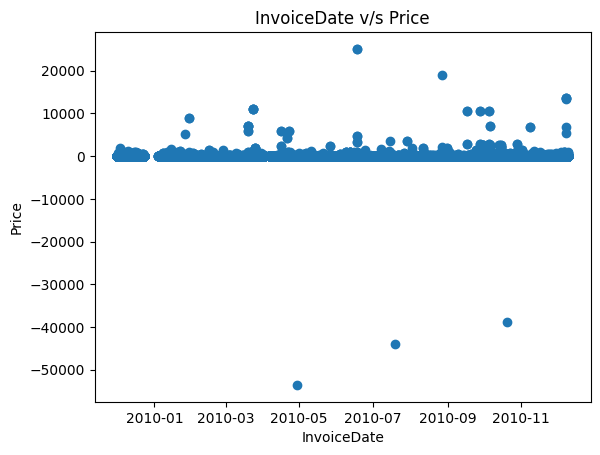

## Correlation:

## Missing Matrix:

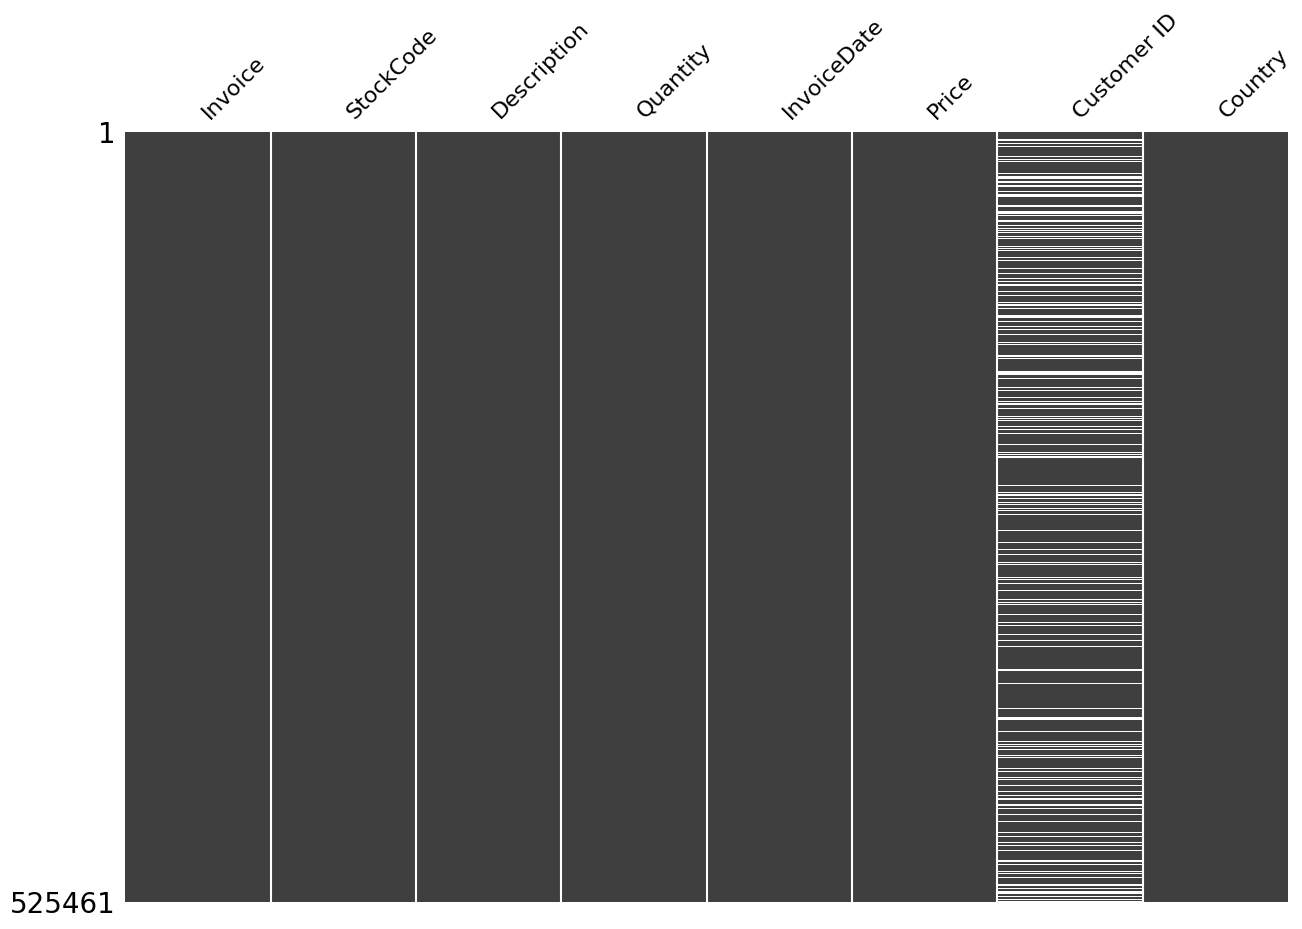

In [16]:
profile_df(df_retail)

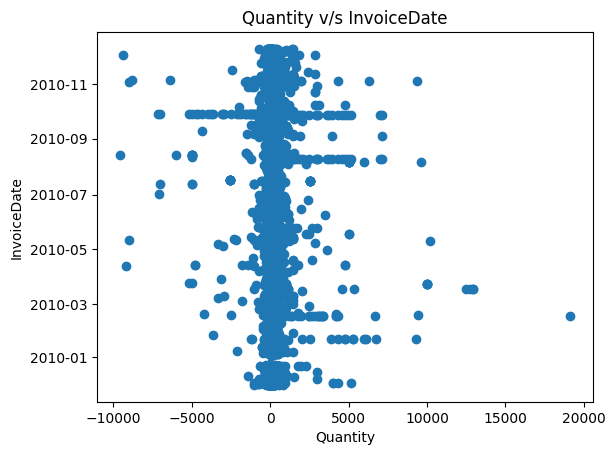

Del gráfico de "Cantidad vs fecha de facturación". 

* Recordando que la gran mayoria de las cantidades compradas oscila entre 0 a 10, se observa una concentración notoria cerca del cero en cantidad para todos los periodo.

* Hay un periodo en el 2010-10 en que hay consistentemente una fila de puntos con alta concentracion de compras para un gran espectro de cantidades, dentro del rango de -5000 a 5000.   

* Tambien se observan claramente los outliers con negativas y la compra de gran cantidad en marzo del 2010.



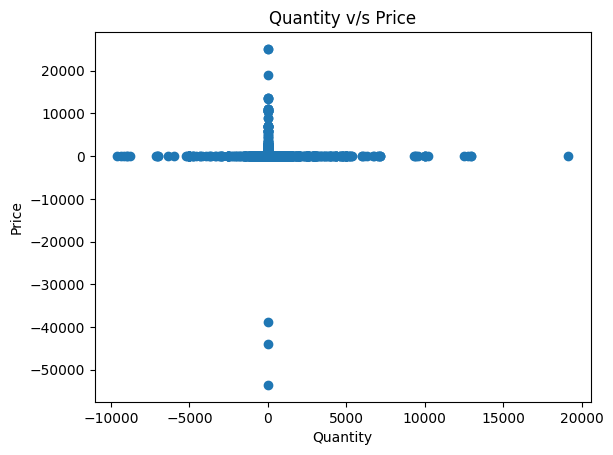

Del gráfico de "Cantidad vs precio":

* Se observa que los precios en los que hay outliers de precio tienen una cantidad baja en cantidad 
* En general, independiente de la cantidad todos los precios estan en precios "cercanos" a cero, lo que podría indicar que los precios son unitarios. 
* Los outliers que se observan presuntamente son productos mal etiquetados pues serían algo como "1 articulo con un precio demasiado alto/negativo"  

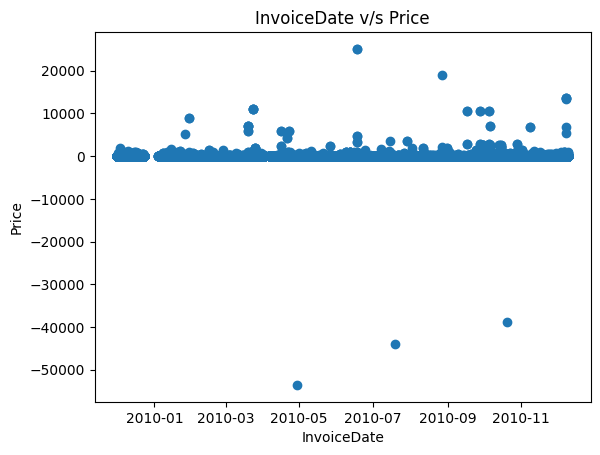

Del gráfico de "fecha de factura vs precio":
* Se observan claramente los outliers en compras en 3 periodos con compras de precio negativo.
* La mayor concenctración de compras está cercano al 0 en precio para todos los periodos con cierta concentración en un rango mayor en los periodos de octubre a diciembre del 2010, atribuible a las festividades.
* La compra de precio más alto se registra en 2010-06.  

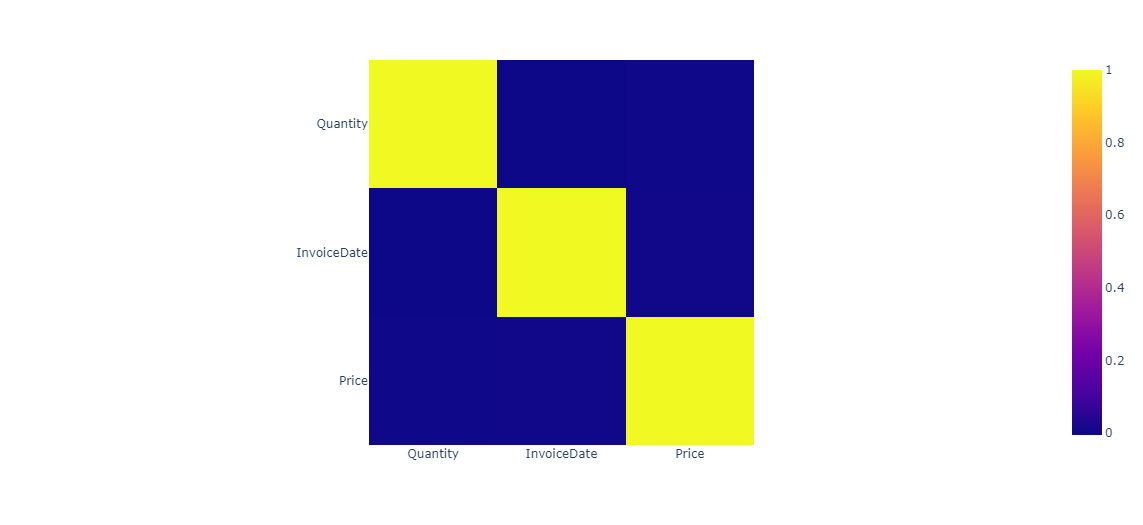

Del gráfico de correlación se observa que NO hay ningun tipo de correlación entre los valores númericos presentados, lo cual es consistente con los gráficos anteriores donde todos presentaban una alta densidad solo en un eje. 

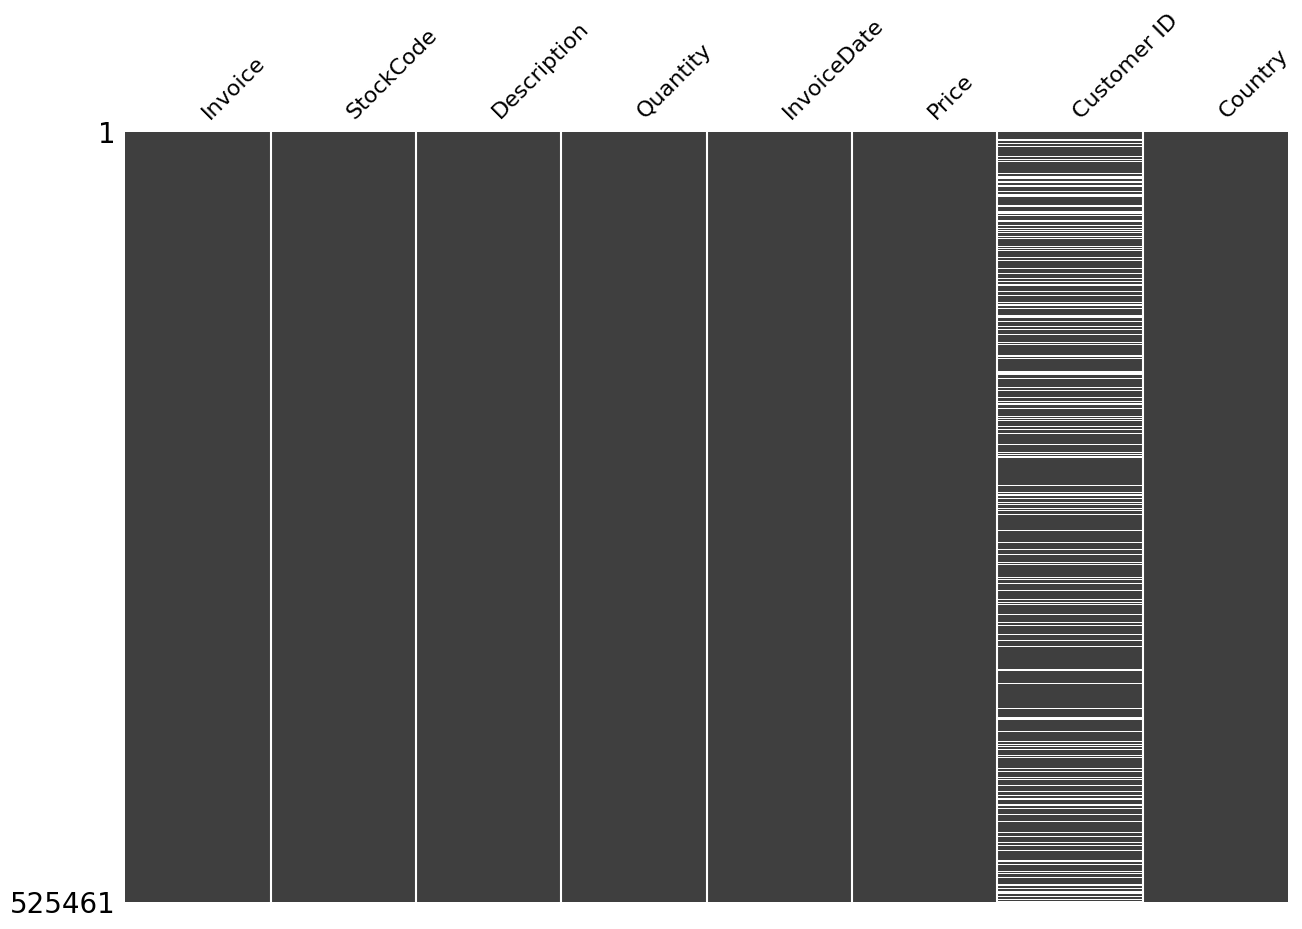

Del grafico de valores faltantes destaca que sólo la columna de "customers Id" tenga valores faltantes. 

Destacar que del gráfico de analisis unitario de la columna "Descripción" pudimos ver que existen una gran cantidad de valores NaN (2928) que no se aprecian en este gráfico pues están registrados como "nan". 

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [17]:
def limpieza_ventas(df_o):
  df=df_o.copy()
  #No tocaremos:
  # paises  # no es reelevante para el analisis 
  # fechas #no se observan outliers
  # invoice - Stock code por ser categoricas sin valores faltantes
  
  
  # Considerando solo compras con precio > 0 y de cantidades >1 
  df = df[(df["Quantity"]>1)&(df["Price"]>0)]
  #Eliminado valores con nulls de Customer ID:
  # ~ 38000 datos pos filtro
  df = df.dropna(subset=['Customer ID'])

  #eliminando el ultimo 1% mediante dado que hasta 3 veces la std
  # está el 99% de los datos
  # se eliman solo de la derecha dado el filtro anterior ligado al caracter
  # de los datos
  df = df[df["Quantity"].between(0,df["Quantity"].quantile(.99))]
  df = df[df["Price"].between(0,df["Price"].quantile(.99))]
  return df 

df_clean=limpieza_ventas(df_retail)
df_clean.head(3)

  


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [18]:
df_clean.describe()

,Quantity,InvoiceDate,Price
count,322187.000000,322187,322187.000000
mean,12.064596,2010-06-30 14:22:57.724861952,2.625395
min,2.000000,2009-12-01 07:45:00,0.040000
25%,3.000000,2010-03-26 14:38:00,1.250000
50%,6.000000,2010-07-08 14:06:00,1.690000
75%,12.000000,2010-10-12 13:35:00,2.950000
max,144.000000,2010-12-09 20:01:00,12.750000
std,16.998895,NaN,2.363094


In [19]:
df_retail.describe()

,Quantity,InvoiceDate,Price
count,525461.000000,525461,525461.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834
min,-9600.000000,2009-12-01 07:45:00,-53594.360000
25%,1.000000,2010-03-21 12:20:00,1.250000
50%,3.000000,2010-07-06 09:51:00,2.100000
75%,10.000000,2010-10-15 12:45:00,4.210000
max,19152.000000,2010-12-09 20:01:00,25111.090000
std,107.424110,NaN,146.126914


## Analisis bi-variable post limpieza

## Bivariant Analysis:

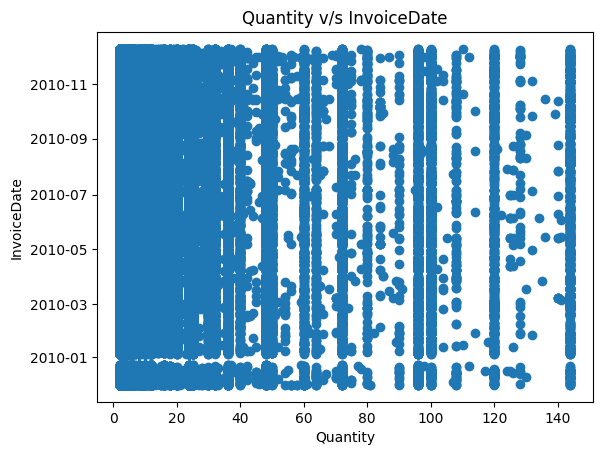

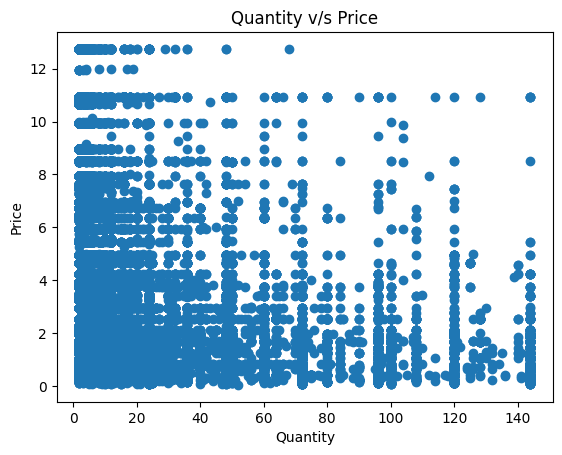

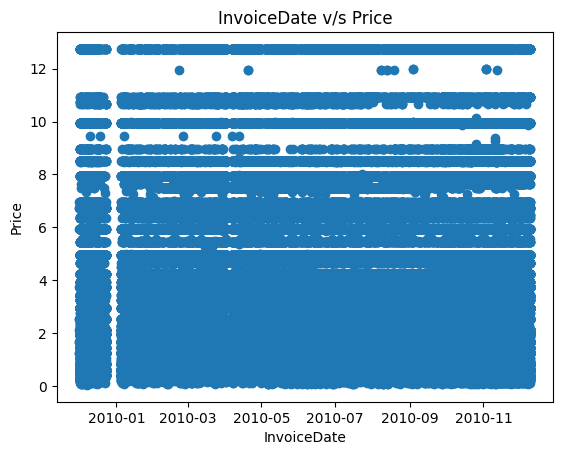

## Correlation:

## Missing Matrix:

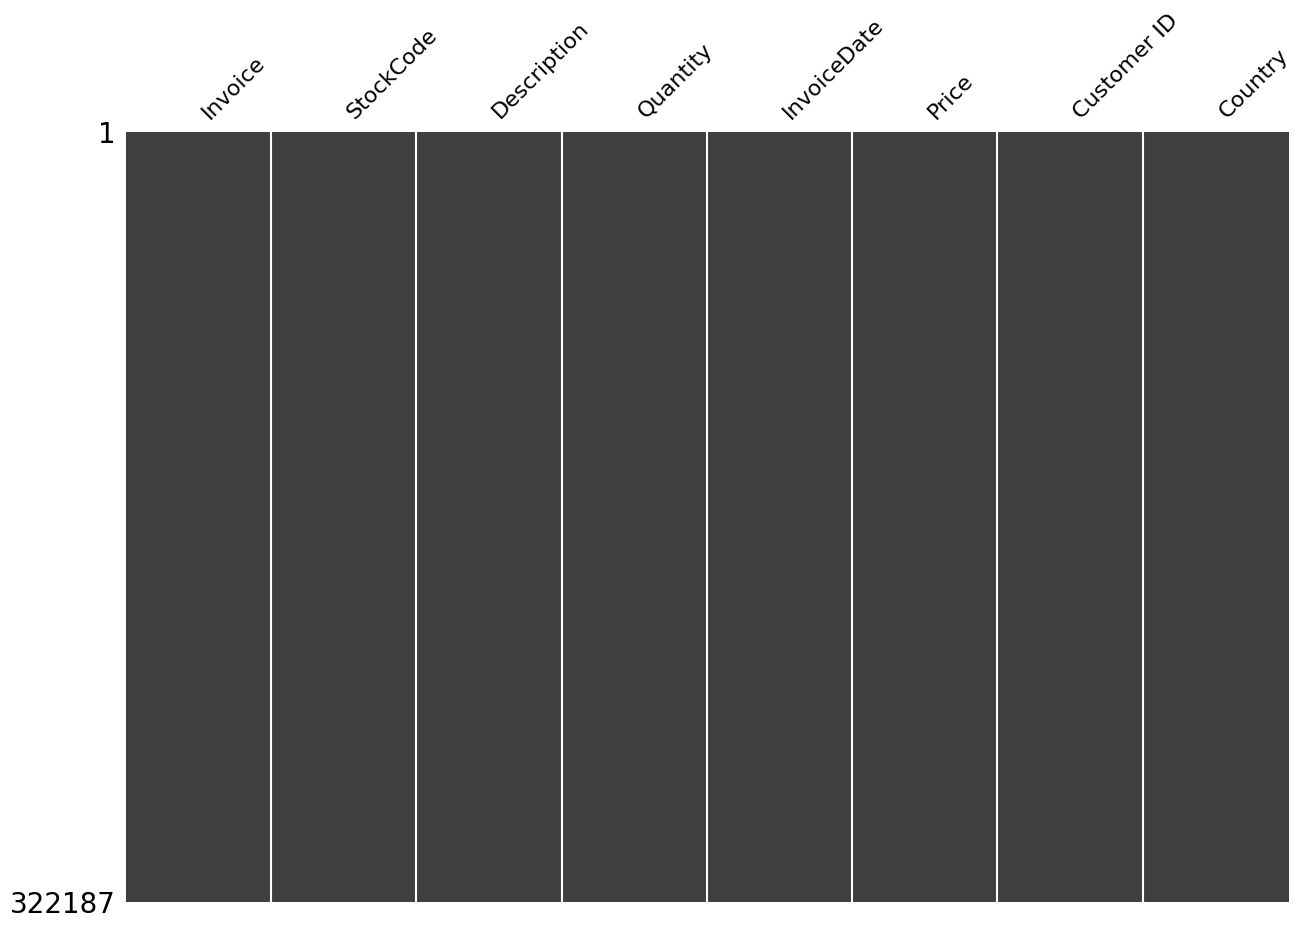

In [20]:
profile_df(df_clean)

De los cambios observados destacan:
* De la matriz de correlación ahora se aprecia una correlacion negativa entre los precios y las cantidades, siendo inversamente proporcionales, es decir, se compran menos cantidad si los precios son mas caros. 
* Ya no hay valores nulos en la columna Customer ID en el gráfico missing values.
* Los gráficos se ven mas variados dado que no hay outliers que desplacen los ejes. 


### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [21]:
def top_30_ingresos_cantidades(df_o):
  df=df_o.copy()
  df["Ganancia"] = df['Quantity']*df['Price']

  #agrupamos por descripcion
  df_gr = df[["Description","Quantity","Ganancia"]].groupby("Description").sum()
  df_ganancia = df_gr.sort_values(by="Ganancia",ascending=False).iloc[:30]
  df_cantidad = df_gr.sort_values(by="Quantity",ascending=False).iloc[:30]

  #ganancia
  fig_1 = px.bar(
           df_ganancia,
            y="Ganancia",
            title=f"Top 30 mayores ganancias",
        )
  
  fig_1.show()

  #cantidad
  fig_2 = px.bar(
            df_cantidad,
            y="Quantity",
            title=f"Top 30 mayores cantidades",
        )
  
  fig_2.show()

  # return df_gr

top_30_ingresos_cantidades(df_clean)

¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.    

**R:** 
EL articulo que genera más ganancia no se encuentra en el top 30 de más vendidos, pero el segundo que genera más ganancias esta top 1 en articulos más vendidos. En cuanto a ganancia, la diferencia de los primeros 2 articulos es notoria con los demás del top 30.  

Es decir, no necesariamente los articulos que generan más ganancias son los más vendidos en cantidad.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [22]:
def plot_ventas(dataframe):
  df = dataframe.copy()
  df["Ganancia"] = df['Quantity']*df['Price']
  
  # convertir la columna "InvoiceDate" en un objeto datetime
  df['InvoiceDate'] = df['InvoiceDate'].dt.to_pydatetime()
  #agrupamos por dias 
  df_gr=df[['Ganancia','Quantity']].groupby([df['InvoiceDate'].dt.date]).sum()

  #ganancia
  fig_1 = px.bar(
           df_gr,
            y="Ganancia",
            title=f"Ganancias en el tiempo",
        )
  
  fig_1.show()

  #cantidad
  fig_2 = px.bar(
            df_gr,
            y="Quantity",
            title=f"N° ventas en el tiempo",
        )
  
  fig_2.show()

plot_ventas(df_clean)

¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

**R:** Se observa: 
* una ventana de ausencia de ventas entre el 23 de diciembre al 4 de enero y otra entre el 1 de abril al 6 de abril.
* Los fines de semanas no hay registros de ventas
* En general, los jueves y viernes de las semanas vistas tienden a tener mejores ventas tanto en cantidad como en cantidad con respecto a lunes y martes.
* En general los lunes son los dias ocn menor numero de ventas.
* En las ultimas 11 semanas hay un aumento notable en el numero de ventas y en los ingresos, además, se invierte la tendencia y en la mayoria de estas hay un pick de ventas en los dias martes o miercoles a diferencia del resto del año. 


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>